In [6]:
from model.classification_model import ClassifierModel
from sklearn import metrics

from asid.automl_imbalanced.abb import AutoBalanceBoost

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

from hyperopt import hp, fmin, tpe

from model.reduce_model import ReduceModel, AE, VAE

from plot_settings import ide_plot

# plot settings
ide_plot()

In [2]:
dataset = pd.read_csv("main_datasets/dataset.csv", index_col=0)
target = pd.read_csv("main_datasets/target.csv", index_col=0)

In [5]:
reduce_model = ReduceModel(model="AE", layers=(1169, 500, 200, 10))

In [6]:
reduce_model.train(epochs=100, lr=1e-4)

100%|██████████| 100/100 [00:32<00:00,  3.10it/s]

Epoch 100, Train Loss: 0.008112261754049117
Epoch 100, Validation Loss: 0.00823123956268484


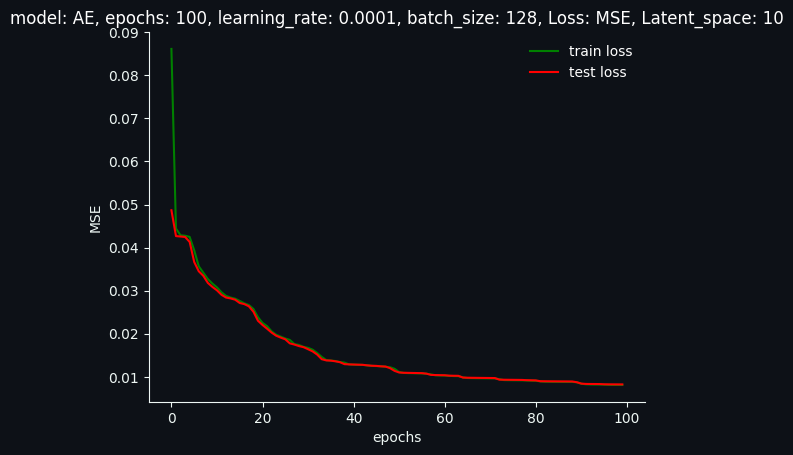

In [7]:
reduce_model.plot_loss()

In [8]:
main_reduced = reduce_model.transform(dataset)

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: title={'center': '8'}>],
       [<Axes: title={'center': '9'}>, <Axes: >, <Axes: >]], dtype=object)

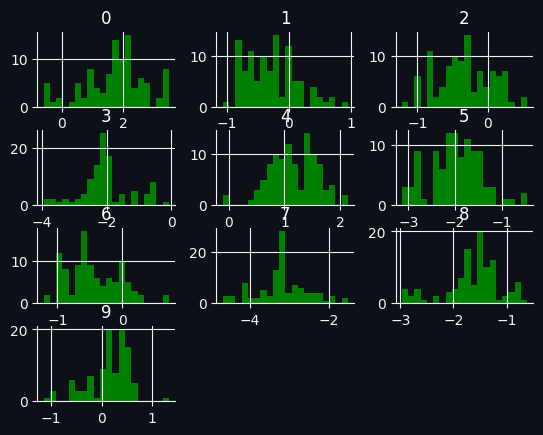

In [9]:
pd.DataFrame(main_reduced).hist(bins=20)

In [10]:
def tsne_plot(x1, y1, name):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth=1, alpha=0.8, label='0')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth=1, alpha=0.8, label='1')
    plt.title(name)
    plt.legend()
    plt.show()

def pca_plot(x1, y1, name):
    pca = PCA(n_components=2, random_state=0)
    X_t = pca.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth=1, alpha=0.8, label='0')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth=1, alpha=0.8, label='1')
    plt.title(name)
    plt.legend()
    plt.show()

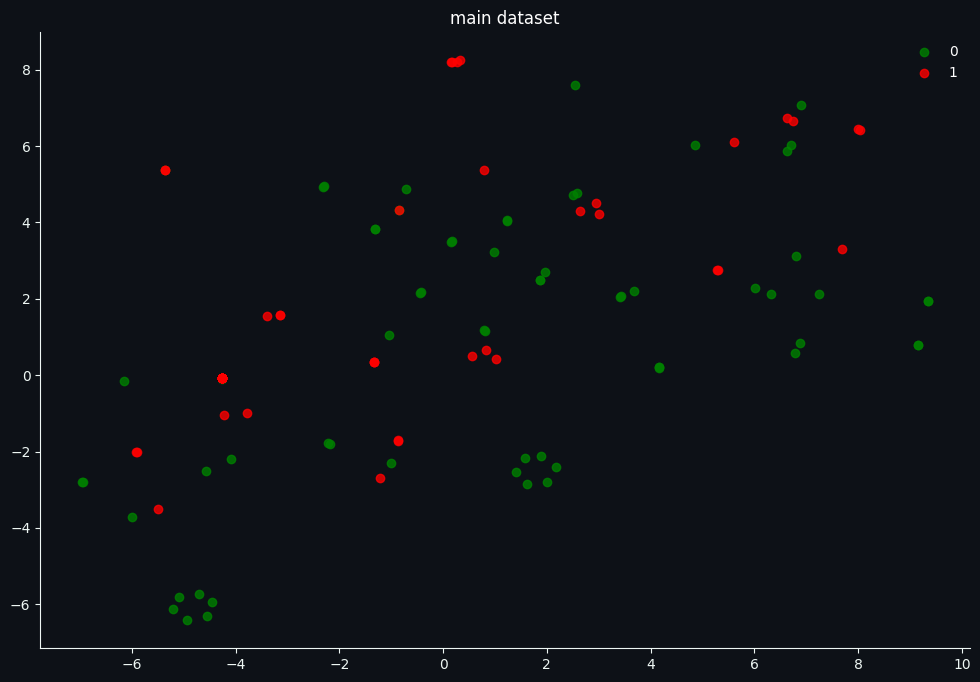

In [11]:
tsne_plot(dataset, target, "main dataset")

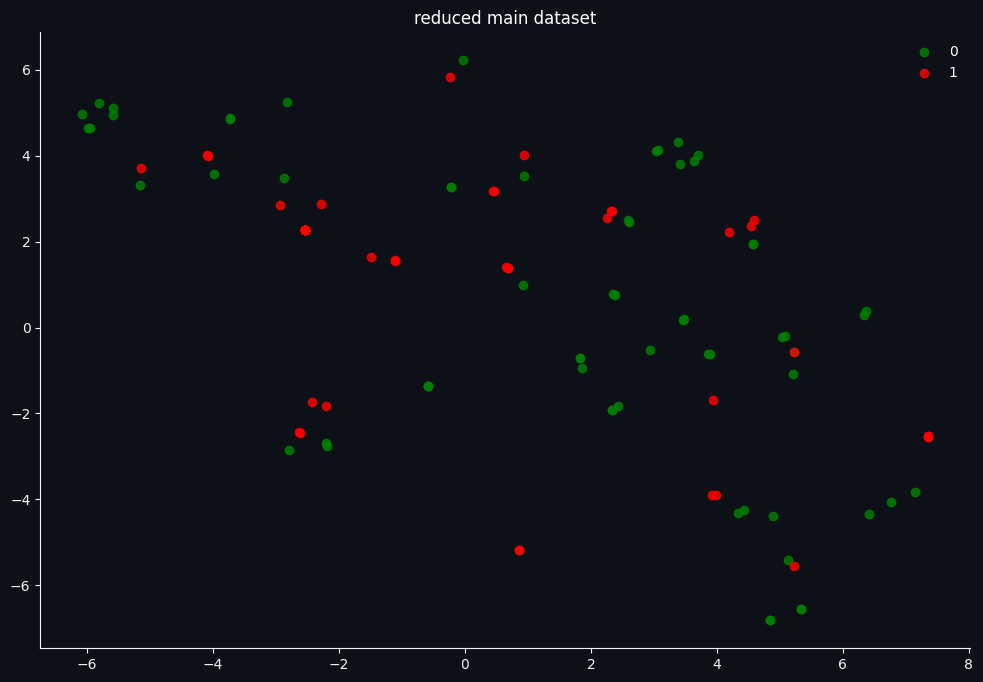

In [12]:
tsne_plot(main_reduced, target, "reduced main dataset")

In [13]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    main_reduced, target.values.ravel(), test_size=0.2, random_state=0)

X_train_smote, y_train_smote = SMOTE(random_state=42).fit_resample(X_train, y_train)


scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from catboost import CatBoostClassifier

c = AutoBalanceBoost().fit(X_train_smote, y_train_smote)



array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: title={'center': '8'}>],
       [<Axes: title={'center': '9'}>, <Axes: >, <Axes: >]], dtype=object)

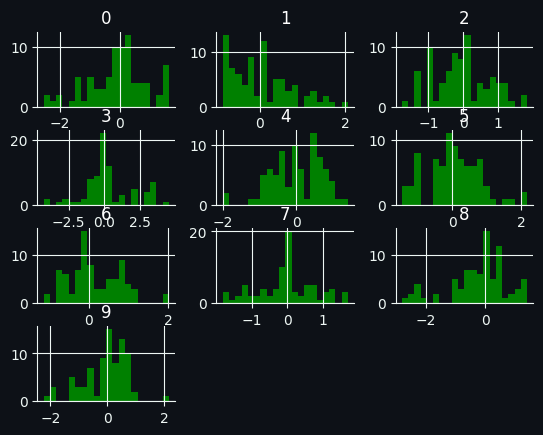

In [15]:
pd.DataFrame(X_train).hist(bins=20)

In [16]:
c_model = ClassifierModel()

In [17]:
res = c_model.cv(pd.DataFrame(X_train), pd.DataFrame(y_train))

evaluate CatBoost
  0%|          | 0/9223372036854775807 [00:00<?, ?trial/s, best loss=?]

  0%|          | 89/9223372036854775807 [00:10<288854573432623:21:36,  8.87trial/s, best loss: -0.6666666666666666]
evaluate LGM
  0%|          | 342/9223372036854775807 [00:10<75040445130044:18:40, 34.14trial/s, best loss: -0.4074074074074074]
evaluate XGB
  0%|          | 186/9223372036854775807 [00:10<137762626312532:41:36, 18.60trial/s, best loss: -0.6135265700483091]
evaluate RF
  0%|          | 69/9223372036854775807 [00:10<374888147841160:23:28,  6.83trial/s, best loss: -0.6666666666666666]
evaluate AdaBoost
  0%|          | 58/9223372036854775807 [00:10<449985581134135:57:52,  5.69trial/s, best loss: -0.6666666666666666]


In [18]:
res

{'CatBoost': {'depth': 10,
  'l2_leaf_reg': 0.9702949935748377,
  'learning_rate': 0.003579685302308308,
  'n_estimators': 62,
  'score': 0.8545454545454545,
  'balance': {'test': {'0.0': 10, '1.0': 6}, 'train': {'0.0': 42, '1.0': 23}}},
 'LGM': {'learning_rate': 0.005501682953579637,
  'max_depth': 8,
  'n_estimators': 77,
  'reg_lambda': 0.14970316484965332,
  'score': 0.4074074074074074,
  'balance': {'test': {'0.0': 11, '1.0': 5}, 'train': {'0.0': 41, '1.0': 24}}},
 'XGB': {'learning_rate': 3.307633733736702e-05,
  'max_depth': 92,
  'n_estimators': 67,
  'reg_lambda': 0.19136710592655684,
  'score': 0.873015873015873,
  'balance': {'test': {'0.0': 10, '1.0': 6}, 'train': {'0.0': 42, '1.0': 23}}},
 'RF': {'max_depth': 55,
  'n_estimators': 98,
  'score': 0.7922077922077921,
  'balance': {'test': {'0.0': 10, '1.0': 6}, 'train': {'0.0': 42, '1.0': 23}}},
 'AdaBoost': {'learning_rate': 0.0003281070312777256,
  'max_depth': 7,
  'n_estimators': 96,
  'score': 1.0,
  'balance': {'test':

In [19]:
c_model.set_params({name: {param: res[name][param] for param in res[name] if param not in ("balance", "score")} for name in res})

In [20]:
c_model.fit(X_train, y_train)

In [21]:
for name in c_model.models:
    print(f"report for {name}")
    print(metrics.classification_report(y_test, c_model.models[name].predict(X_test)))

report for CatBoost
              precision    recall  f1-score   support

         0.0       0.80      0.92      0.86        13
         1.0       0.83      0.62      0.71         8

    accuracy                           0.81        21
   macro avg       0.82      0.77      0.79        21
weighted avg       0.81      0.81      0.80        21

report for LGM
              precision    recall  f1-score   support

         0.0       0.62      1.00      0.76        13
         1.0       0.00      0.00      0.00         8

    accuracy                           0.62        21
   macro avg       0.31      0.50      0.38        21
weighted avg       0.38      0.62      0.47        21

report for XGB
              precision    recall  f1-score   support

         0.0       0.78      0.54      0.64        13
         1.0       0.50      0.75      0.60         8

    accuracy                           0.62        21
   macro avg       0.64      0.64      0.62        21
weighted avg       0.67 

C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344

In [22]:
def roc_auc_plot(clf_model: ClassifierModel, x_test, y_test):
    plt.figure()
    lw = 2
    plt.plot()
    for clf in clf_model.models:
        pred_proba = clf_model.models[clf].predict_proba(x_test)
        fpr, tpr, threshold = metrics.roc_curve(y_test, pred_proba[:,1])
        auc = metrics.auc(fpr, tpr)
        plt.plot(fpr,
                 tpr,
                 label=f"ROC curve {clf} (area={auc:.2f})")
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()

def roc_auc_plot_one(clf: object, x_test, y_test):
    plt.figure()
    lw = 2
    plt.plot()
    pred_proba = clf.predict_proba(x_test)
    fpr, tpr, threshold = metrics.roc_curve(y_test, pred_proba[:,1])
    auc = metrics.auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label=f"ROC curve: (area={auc:.2f})")
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()

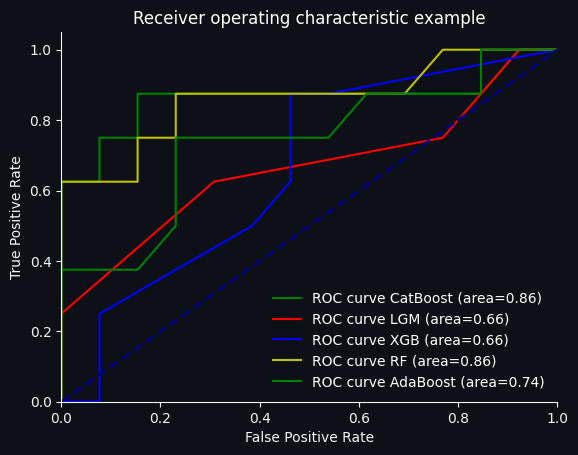

In [27]:
roc_auc_plot(c_model, X_test, y_test)

In [29]:
from asid.automl_imbalanced.abb import AutoBalanceBoost
from catboost import CatBoostClassifier
from model.classification_model import AdaBoostClf

In [30]:
c = CatBoostClassifier().fit(X_train_smote, y_train_smote)

Learning rate set to 0.003919
0:	learn: 0.6911758	total: 5.96ms	remaining: 5.95s
1:	learn: 0.6894213	total: 8.06ms	remaining: 4.02s
2:	learn: 0.6870366	total: 9.87ms	remaining: 3.28s
3:	learn: 0.6854106	total: 12.3ms	remaining: 3.05s
4:	learn: 0.6833170	total: 14.4ms	remaining: 2.87s
5:	learn: 0.6809208	total: 16.6ms	remaining: 2.74s
6:	learn: 0.6788134	total: 24.3ms	remaining: 3.44s
7:	learn: 0.6770102	total: 50.5ms	remaining: 6.26s
8:	learn: 0.6750950	total: 54.5ms	remaining: 6s
9:	learn: 0.6722857	total: 79.2ms	remaining: 7.84s
10:	learn: 0.6699889	total: 84.8ms	remaining: 7.63s
11:	learn: 0.6681737	total: 88.8ms	remaining: 7.31s
12:	learn: 0.6656411	total: 91.6ms	remaining: 6.95s
13:	learn: 0.6640747	total: 94.4ms	remaining: 6.65s
14:	learn: 0.6623534	total: 96.9ms	remaining: 6.36s
15:	learn: 0.6609204	total: 99.4ms	remaining: 6.11s
16:	learn: 0.6590170	total: 102ms	remaining: 5.89s
17:	learn: 0.6564767	total: 105ms	remaining: 5.71s
18:	learn: 0.6543524	total: 107ms	remaining: 5.54

In [31]:
print(metrics.classification_report(y_test, c.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.62      1.00      0.76        13
         1.0       0.00      0.00      0.00         8

    accuracy                           0.62        21
   macro avg       0.31      0.50      0.38        21
weighted avg       0.38      0.62      0.47        21



C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344

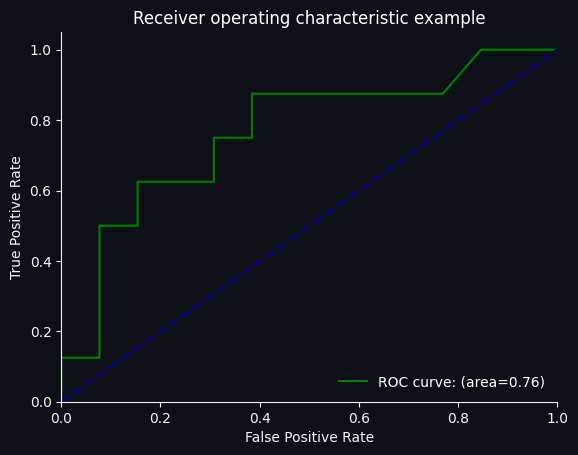

In [32]:
roc_auc_plot_one(c, X_test, y_test)